# Graph and network processing

A great deal of data that you will encounter as a data scientist fundamentally involves network data, interrelated objects with relationships between them.

Graphs as mathematical objects are collections of vertices (also called nodes) and edges. In general “network” refers to the interrelation between actual entities in the real world, where as “graph” refers to the mathematical models for representing vertices and edges (which will often be used to represent networks).

![graph](../resources/graph-1.jpg)

## Graph models

- directed vs undirected
- Weighted vs. unweighted graphs

Example graph

![graph](../resources/graph-2.png)

Nodes: $N = \{A,B,C,D,E\}$

Edges: $E=\{(A,B),(A,E), (D,A), (C,D)\}$

Directed graph:

![graph](../resources/graph-3.png)

Weighted graph: 

![graph](../resources/graph-4.png)

## Graph representations

![graph](../resources/graph-5.png)

Ways to represent graph:

- Adjacency list
- Adjacency dictionary
- Adjacency matrix

### Adjacency List

One of the simplest way to represent directed graphs is as a two-level list, where the elements in the list describe the nodes that each node is connected to.

In [2]:
nodes = ["A", "B", "C", "D"]
print(nodes)
nodes_dict = {"A":0, "B":1, "C":2, "D":3} # if we want a fast way of looking up nodes, we can create a dictionary of nodes to indices
nodes_dict = {k:i for i,k in enumerate(nodes)}  # same as the above, done programmatically
print(nodes_dict)

adj_list = [[1], [2], [0,3], []]
print(adj_list[2])

['A', 'B', 'C', 'D']
{'A': 0, 'B': 1, 'C': 2, 'D': 3}
[0, 3]


**Pros**: easy to get all outgoing links from a given node, fast to add new edges 
(without checking for duplicates)

**Cons**: deleting edges or checking existence of an edge requires scan through 
given node’s full adjacency array

## Adjacency dictionary

For each node, store a dictionary of the nodes that it connects to

In [ ]:
adj_dict = {"A": {"B":1.0}, "B":{"C":1.0}, "C":{"A":1.0, "D":1.0}, "D":{}}

**Pros**: easy to add/remove/query edges (requires two dictionary lookups, so a 𝑂(1)
operation)

**Cons**: overhead of using a dictionary over array

## Adjacency matrix

Store the connectivity of the graph as a matrix.

$
\mathbf{A} = \begin{bmatrix}
0 & 0 & 1 & 0 \\
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0
\end{bmatrix}
$

In virtually all cases, you will want to store this as a sparse matrix.

Pros/cons depend on which sparse matrix format you use, but most operations on a static 
graph will but much faster using the right format.

## Graph algorithms

- **Dijsktra’s algorithm**

*Purpose*: Dijkstra’s algorithm finds the shortest path from a starting node to all other nodes in a graph with non-negative edge weights.

How it works:

Start at the initial node and assign it a distance of 0 (to itself), and set all other nodes’ distances to infinity.

From the current node, look at all its unvisited neighbors, and calculate their tentative distances (current node’s distance + edge weight).

Update the neighbor’s distance if the new calculated distance is smaller.

Mark the current node as visited, then move to the unvisited node with the smallest tentative distance.
Repeat this process until all nodes have been visited.

The result is the shortest path from the starting node to all other nodes.


- **PageRank**

*Purpose*: PageRank ranks web pages in search results based on their importance, using links between pages to measure relevance.

How it works:

Consider the web as a directed graph where nodes represent web pages, and edges represent hyperlinks.
Initially, assign an equal rank (importance) to all pages.

For each page, distribute its rank equally to all the pages it links to.

A page’s rank is then updated as the sum of the ranks it receives from other pages linking to it.

After several iterations, the algorithm stabilizes, and each page is assigned a final rank based on the number and quality of incoming links.

Pages with more high-quality incoming links get higher ranks.


- **Girvan-Newman**

*Purpose*: The Girvan-Newman algorithm is used to detect community structures in a network by iteratively removing edges with high "betweenness" (i.e., edges that frequently lie on the shortest paths between nodes).

How it works:

For each edge in the graph, calculate its "betweenness," which measures how often it appears on the shortest paths between pairs of nodes.

Remove the edge with the highest betweenness, as it likely connects different communities.

Recalculate betweenness after each edge removal and repeat the process.

Eventually, the graph breaks into disconnected subgraphs, each representing a community.

This algorithm is useful for uncovering hierarchical structures in networks.

In [9]:
# Dijsktra’s algorithm
import numpy as np

def dijkstra(graph, start):
    n = len(graph)
    visited = np.full(n, False)  # Track visited nodes
    dist = np.full(n, np.inf)    # Distance array initialized to infinity
    dist[start] = 0              # Distance to the start node is 0

    for _ in range(n):
        # Select the unvisited node with the smallest distance
        u = np.argmin(np.where(visited, np.inf, dist))

        visited[u] = True

        # Update the distances of neighboring nodes
        for v in range(n):
            if graph[v, u] > 0 and not visited[v]:
                new_dist = dist[u] + graph[v, u]
                if new_dist < dist[v]:
                    dist[v] = new_dist

    return dist

# Example usage
graph = np.array([[0,0,1,0], [1,0,0,0], [0,1,0,0], [0,0,1,0]])

start_node = 0
distances = dijkstra(graph, start_node)
print("Shortest distances from node", start_node, ":", distances)


Shortest distances from node 0 : [0. 1. 2. 3.]


In [4]:
# RageRank:

import numpy as np

A = np.array([[0,0,1,0], [1,0,0,0], [0,1,0,0], [0,0,1,0]])
d = 0.1
T = 1000

P = A.copy()
P[:, P.sum(0) == 0] = 1
P = P / (P.sum(0)+1e-10)
Phat = (1-d)*P + d/A.shape[0]*np.ones(A.shape)
x = np.ones(A.shape[0])/A.shape[0]
for _ in range(T):
    x = Phat @ x
    x = x/x.sum()
print(x)

[0.21260745 0.26418338 0.31060172 0.21260745]


## The NetworkX graph library

In [5]:
import networkx as nx

G_undirected = nx.Graph()
G_directed = nx.DiGraph()

Nodes in a NetworkX can be any hashable type (i.e., any type that can be used as a key in a dictionary, and in fact as we will see shortly, Network uses the adjacency dictionary representation of the graph internally). We can add nodes using the `.add_node()` and `.add_nodes_from()` calls. Similarly, we can remove nodes using the `.remove_node()` or `.remove_nodes_from()` calls. Finally, a list of nodes can be given by the `.nodes()` call.

In [6]:
G = nx.Graph()
G.add_node("A")
G.add_nodes_from(["B","C"])
print(G.nodes())

['A', 'B', 'C']


In [7]:
G.remove_nodes_from(["A", "C"])
print(G.nodes())
G.add_nodes_from(["A", "C"])
G.remove_node("B")
print(G.nodes())

['B']
['A', 'C']


Edges can be added and removed from the graph using using the `.add_edge()` (add a single edge), `.add_edges_from()` (add a sequence of edges from a list), `.remove_edge()` and `remove_edges_from()` (similar to before). Note that we can add edges between nodes that do not exist, and the relevant nodes are automatically added to the graph (for this reason, it is more common to simply add edges, rather than add nodes and edges separately, when constructing a graph). Like the `.nodes()` call the `.edges()` call returns a list of edges in the graph, represented as tuples

In [8]:
G = nx.DiGraph()
G.add_edges_from([("A","B"), ("B","C"), ("C","A"), ("C","D")])
print(G.nodes())
print(G.edges())

['A', 'B', 'C', 'D']
[('A', 'B'), ('B', 'C'), ('C', 'A'), ('C', 'D')]


In [9]:
G.remove_edge("A","B") 
print(G.edges())

[('B', 'C'), ('C', 'A'), ('C', 'D')]


In [ ]:
G.remove_edges_from([("A","B"), ("B","C")])
print(G.edges())

Removing a node will remove all the edges connected to that node.

In [10]:
G = nx.DiGraph()
G.add_edges_from([("A","B"), ("B","C"), ("C","A"), ("C","D")])
G.remove_node("A")
print(G.edges())

[('B', 'C'), ('C', 'D')]


## Internal representations and node/edge data

Internally, NetworkX uses the adjacency dictionary representation to represent the graph. We can access these elements by just indexing into the graph object itself.

In [11]:
G = nx.DiGraph()
G.add_edges_from([("A","B"), ("B","C"), ("C","A"), ("C","D")])
print(G["C"])

{'A': {}, 'D': {}}


This dictionary is precisely where we store any relevant attributes for this edge. For example, to add a “color” attribute to an edge, we just add the key/value pair to the edge.

In [13]:
G["A"]["B"]["color"] = "red"

In [12]:
G["A"]["B"]["weight"] = 1.0
print(G["A"]["B"])

{'weight': 1.0}


The `.nodes()` and `.edges()` lists by default will not return any of the attributes. If we want to data returned too, we need to pass the `data=True` argument.

In [16]:
print(G.edges(data=True))

[('A', 'B', {'weight': 1.0, 'color': 'red'}), ('B', 'C', {}), ('C', 'A', {}), ('C', 'D', {})]


## Drawing graphs

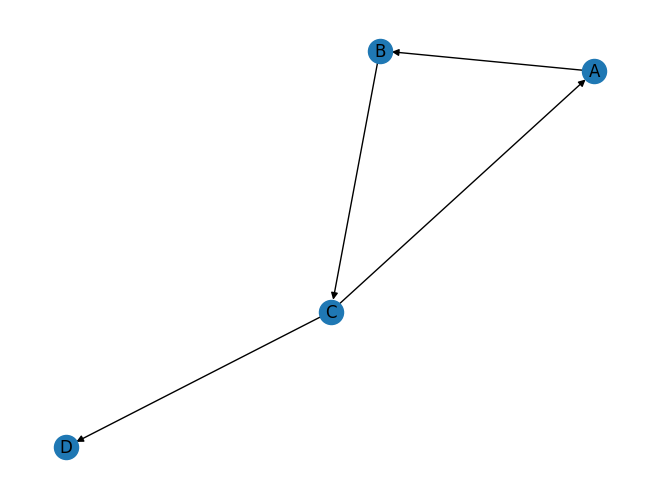

In [17]:
G = nx.DiGraph()
G.add_edges_from([("A","B"), ("B","C"), ("C","A"), ("C","D")])
nx.draw(G, with_labels=True)

## Graph algorithms in NetworkX

In [20]:
# Dijsktra’s algorithm

G = nx.Graph()
G.add_edges_from([("A","B"), ("B","C"), ("C","A"), ("C","D")])
print(nx.shortest_path_length(G, source="A"))
print(nx.shortest_path(G, source="A"))

{'A': 0, 'B': 1, 'C': 1, 'D': 2}
{'A': ['A'], 'B': ['A', 'B'], 'C': ['A', 'C'], 'D': ['A', 'C', 'D']}


In [21]:
# RageRank

G = nx.DiGraph()
G.add_edges_from([("A","B"), ("B","C"), ("C","A"), ("C","D")])
nx.pagerank(G, alpha=0.9) # alpha is 1-d

{'A': 0.21260752770379676,
 'B': 0.2641838185655828,
 'C': 0.31060112602682377,
 'D': 0.21260752770379676}

[({1, 2, 3, 4, 5, 6, 7}, {8, 9, 10, 11, 12, 13, 14}),
 ({1, 2, 3}, {4, 5, 6, 7}, {8, 9, 10, 11, 12, 13, 14}),
 ({1, 2, 3}, {4, 5, 6, 7}, {9, 10, 11}, {8, 12, 13, 14}),
 ({1, 2, 3}, {4, 5, 6}, {9, 10, 11}, {8, 12, 13, 14}, {7}),
 ({1, 2, 3}, {4, 5, 6}, {9, 10, 11}, {12, 13, 14}, {7}, {8}),
 ({1}, {2, 3}, {4, 5, 6}, {9, 10, 11}, {12, 13, 14}, {7}, {8}),
 ({1}, {2}, {3}, {4, 5, 6}, {9, 10, 11}, {12, 13, 14}, {7}, {8}),
 ({1}, {2}, {3}, {4}, {5, 6}, {9, 10, 11}, {12, 13, 14}, {7}, {8}),
 ({1}, {2}, {3}, {4}, {5}, {6}, {9, 10, 11}, {12, 13, 14}, {7}, {8}),
 ({1}, {2}, {3}, {4}, {5}, {6}, {9}, {10, 11}, {12, 13, 14}, {7}, {8}),
 ({1}, {2}, {3}, {4}, {5}, {6}, {9}, {10}, {11}, {12, 13, 14}, {7}, {8}),
 ({1}, {2}, {3}, {4}, {5}, {6}, {9}, {10}, {11}, {12}, {13, 14}, {7}, {8}),
 ({1}, {2}, {3}, {4}, {5}, {6}, {9}, {10}, {11}, {12}, {13}, {14}, {7}, {8})]

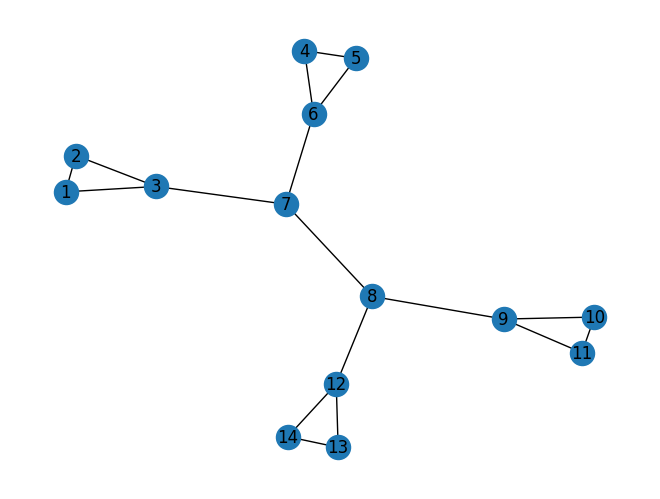

In [25]:
# Girvan-Newman

G = nx.Graph()
G.add_edges_from([(1,2), (1,3), (2,3), (4,5), (4,6), (5,6), 
                  (9,10), (9,11), (10,11), (12,13), (12,14), (13,14),
                  (3,7), (6,7), (7,8), (8,9), (8,12)])

nx.draw(G, with_labels=True)
communities = nx.community.girvan_newman(G)
list(communities)

Go to https://networkx.org/documentation/stable/reference/algorithms/index.html for the whole list of fun algorithms!

In [5]:
# from IPython.display import SVG

# G = nx.DiGraph()
# A = nx.nx_agraph.to_agraph(G)
# G.add_edges_from([("A","B"), ("B","C"), ("C","A"), ("C","D")])
# A.draw("out.svg", prog="circo")
# SVG("out.svg")